In [ ]:
# Name: Alexander Cheng
# Student Number: 1001634298
# Course: MIE1622
# Assignment #4

In [ ]:
# Import libraries
import numpy as np
from numpy import *
from scipy.stats import norm

#To plot your results
import matplotlib
import matplotlib.pyplot as plt
import math
%matplotlib inline
import pandas as pd
import cufflinks as cf
cf.set_config_file(offline=True)

In [ ]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [ ]:
np.random.seed(1)

In [ ]:
# Complete the following functions

# Pricing a European option using Black-Scholes formula
def BS_european_price(S0, K, T, r, sigma):
  # --------- Insert your code here --------- #
  d1 = 1/(sigma*np.sqrt(T))*(np.log(S0/K)+(r+sigma**2/2)*(T)) # T is T-t
  d2 = d1 - sigma*np.sqrt(T)
  # Call Option
  c = norm.cdf(d1)*S0 - norm.cdf(d2)*K*np.exp(-r*(T))
  # Put Option
  p = norm.cdf(-d2)*K*np.exp(-r*T) - norm.cdf(-d1)*S0
  return c, p

# Pricing a European option using Monte Carlo simulations
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
  paths = np.zeros((numSteps + 1, numPaths))
  
  # dT is the time increment (in years)
  dT = T / numSteps
  
  # Vector of paths with simulations of the asset price
  # First asset price is the initial price
  paths[0] = [S0] * numPaths

  # Generate Paths of Stock Price
  for iPath in range(numPaths):
    for iStep in range(numSteps):
      # Geometric Random Walk
      paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
  
  CallPayoffT = np.maximum(paths[numSteps] -K, 0)
  PutPayoffT = np.maximum(K - paths[numSteps], 0)
  c = np.mean(CallPayoffT) * np.exp(-r * T)
  p = np.mean(PutPayoffT) * np.exp(-r * T)

  return c, p

# Pricing a European option using Monte Carlo simulations

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
  paths = np.zeros((numSteps + 1, numPaths))
  
  # dT is the time increment (in years)
  dT = T / numSteps
  
  # Vector of paths with simulations of the asset price
  # First asset price is the initial price
  paths[0] = [S0] * numPaths

  # Generate Paths
  for iPath in range(numPaths):
    for iStep in range(numSteps):
      # Geometric Random Walk
      paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    if np.all(paths[:, iPath] < Sb):
      paths[numSteps][iPath] = K

  CallPayoffT = np.maximum(paths[numSteps] -K, 0)
  PutPayoffT = np.maximum(K - paths[numSteps], 0)
  c = np.mean(CallPayoffT) * np.exp(-r * T)
  p = np.mean(PutPayoffT) * np.exp(-r * T)
  return c, p

In [ ]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations
# Will use more number of paths for more sampling
# numSteps were chosen to be 12(Months), 52(weeks), and 252(trading days)

numSteps = 12;
numPaths = 100000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.060450530055613
One-step MC price of an European put option is 7.840920573848786
Multi-step MC price of an European call option is 7.990448517773648
Multi-step MC price of an European put option is 7.873521968183865
One-step MC price of an Barrier call option is 7.849650504998772
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.93214621191454
Multi-step MC price of an Barrier put option is 1.274492390265891


In [ ]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 52;
numPaths = 100000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.015161880747636
One-step MC price of an European put option is 7.9274454869754445
Multi-step MC price of an European call option is 7.94785269469662
Multi-step MC price of an European put option is 7.886176659380042
One-step MC price of an Barrier call option is 7.829684272035303
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.010029597902415
Multi-step MC price of an Barrier put option is 1.717386354505425


In [ ]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 252;
numPaths = 100000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.149968778804695
One-step MC price of an European put option is 7.8257668716518305
Multi-step MC price of an European call option is 7.972309141645514
Multi-step MC price of an European put option is 7.918148549202533
One-step MC price of an Barrier call option is 7.787853705917305
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.991006857456702
Multi-step MC price of an Barrier put option is 2.018322737248009


Text(0, 0.5, 'Underlying Stock Price')

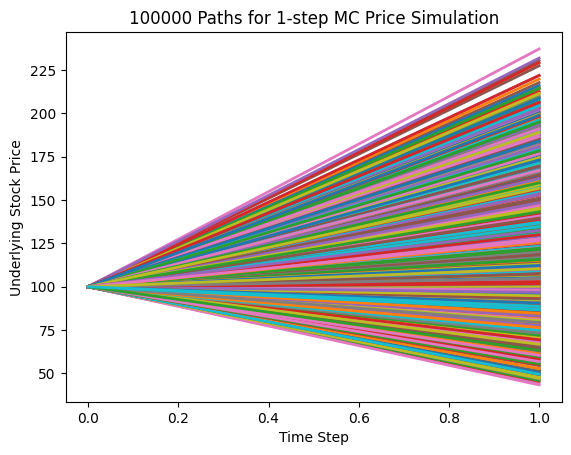

In [ ]:
# Plot results - 1 Step Monte-Carlo Stock Price
# --------- Insert your code here --------- #

numSteps = 1;
numPaths = 100000;

paths = np.zeros((numSteps + 1, numPaths))
    
# dT is the time increment (in years)
dT = T / numSteps
    
# Vector of paths will store realizations of the asset price
# First asset price is the initial price
paths[0] = [S0] * numPaths
 
# Generate paths
for iPath in range(numPaths):
    for iStep in range(numSteps):
        paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
# Plot paths
[plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
plt.title('100000 Paths for 1-step MC Price Simulation')
plt.xlabel('Time Step')
plt.ylabel('Underlying Stock Price')

Text(0.5, 0, 'Underlying Stock Price')

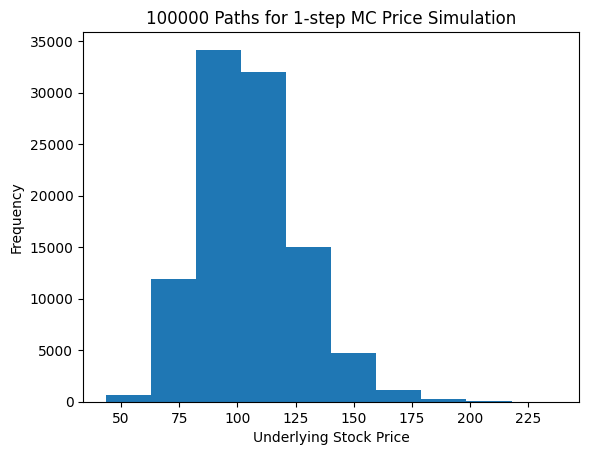

In [ ]:
# Plot results - Distribution of 1 Step Monte-Carlo Stock Price

plt.hist(paths[-1], bins = 10)
plt.title('100000 Paths for 1-step MC Price Simulation')
plt.ylabel('Frequency')
plt.xlabel('Underlying Stock Price')

Text(0, 0.5, 'Underlying Stock Price')

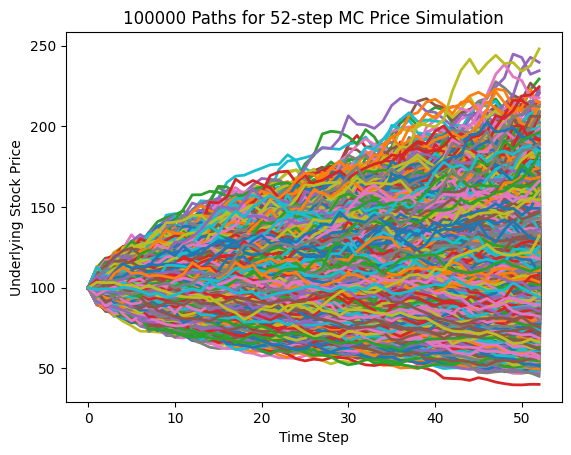

In [ ]:
# Plot results - 52 Step Monte-Carlo Stock Price
# --------- Insert your code here --------- #
import matplotlib.pyplot as plt

numSteps = 52;
numPaths = 100000;

paths = np.zeros((numSteps + 1, numPaths))
    
# dT is the time increment (in years)
dT = T / numSteps
    
# Vector of paths will store realizations of the asset price
# First asset price is the initial price
paths[0] = [S0] * numPaths
 
# Generate paths
for iPath in range(numPaths):
    for iStep in range(numSteps):
        paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
# Plot paths
[plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
plt.title('100000 Paths for 52-step MC Price Simulation')
plt.xlabel('Time Step')
plt.ylabel('Underlying Stock Price')

Text(0.5, 0, 'Underlying Stock Price')

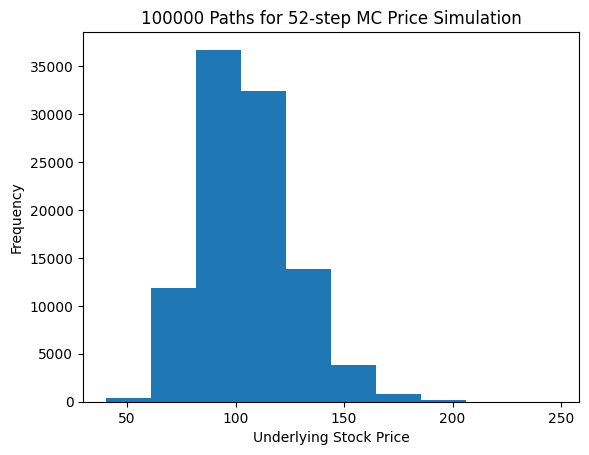

In [ ]:
# Plot results - Distribution of 52 Step Monte-Carlo Stock Price

plt.hist(paths[-1], bins = 10)
plt.title('100000 Paths for 52-step MC Price Simulation')
plt.ylabel('Frequency')
plt.xlabel('Underlying Stock Price')

In [ ]:
# Volatility increased by 10%

sigma = 0.2*1.1
numSteps = 12;

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step))

One-step MC price of an Barrier call option with volatility increased by 10% is 8.658251329622082
One-step MC price of an Barrier put option with volatility increased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.657093178136849
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.5856543858665149


In [ ]:
# Volatility decreased by 10%

sigma = 0.2*0.9
numSteps = 12;

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step))

One-step MC price of an Barrier call option with volatility decreased by 10% is 6.9518301941217135
One-step MC price of an Barrier put option with volatility decreased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility decreased by 10% is 7.103190938498456
Multi-step MC price of an Barrier put option with volatility decreased by 10% is 0.9781872790602056


In [ ]:
# Possible strategies to obtain the same prices from two procedures

sigma = 0.2

for numSteps in [1,12,52,252]:
    for numPaths in [10000,100000,500000,1000000]:
        callMC_European_Price_multi_step, putMC_European_Price_multi_step = \
            MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)
        print(str(numPaths) + '-path ' + str(numSteps) + '-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
        print(str(numPaths) + '-path ' + str(numSteps) + '-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 

10000-path 1-step MC price of an European call option is 8.25255060930108
10000-path 1-step MC price of an European put option is 7.703936002022148
100000-path 1-step MC price of an European call option is 8.09364322133528
100000-path 1-step MC price of an European put option is 7.870056750479562
500000-path 1-step MC price of an European call option is 8.024695977723002
500000-path 1-step MC price of an European put option is 7.911981150735373
1000000-path 1-step MC price of an European call option is 8.008145834723738
1000000-path 1-step MC price of an European put option is 7.928188911472129
10000-path 12-step MC price of an European call option is 8.044704989934967
10000-path 12-step MC price of an European put option is 7.9792124797642705
100000-path 12-step MC price of an European call option is 8.018831149678638
100000-path 12-step MC price of an European put option is 7.85494537050269
500000-path 12-step MC price of an European call option is 8.013049020225928
500000-path 12-st